<a href="https://colab.research.google.com/github/shreyachat/Telco-customer-churn-prediction/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


DATA CLEANING

In [ ]:
# conver totalcahrges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
#missing value check
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)

/tmp/ipython-input-3929950690.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)


TARGET VARIABLE ENCODING

In [ ]:
df['Churn'] = df['Churn'].map({'Yes': 1,'No': 0})

In [ ]:
df['Churn'].value_counts(normalize= True)

,proportion
Churn,
0,0.73463
1,0.26537


EXPALNATORY DATA ANALYSIS

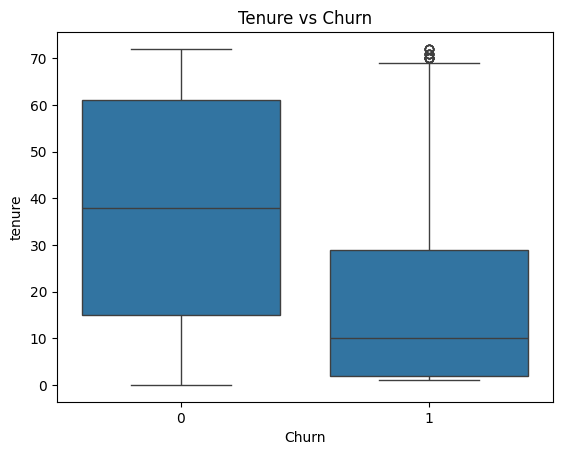

In [ ]:
#NUMERICAL VS CHURN
sns.boxplot(x='Churn',y='tenure',data=df)
plt.title("Tenure vs Churn")
plt.show()

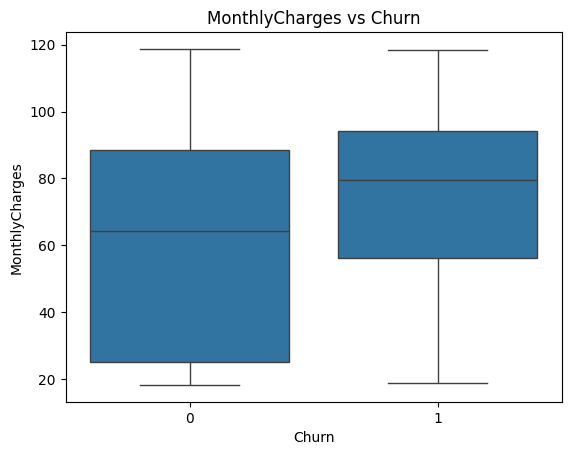

In [ ]:
sns.boxplot(x='Churn',y='MonthlyCharges',data=df)
plt.title("MonthlyCharges vs Churn")
plt.show()

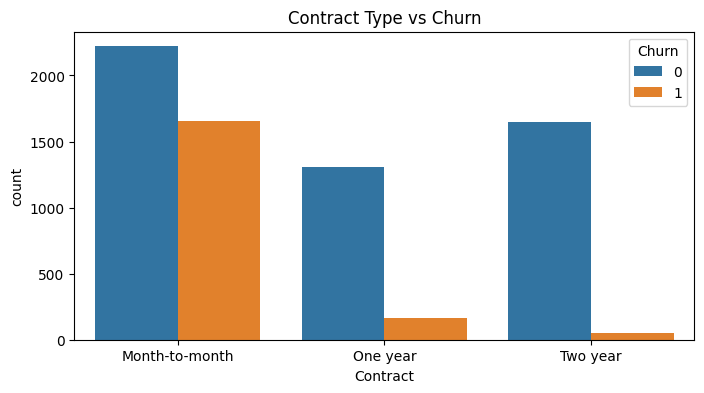

In [ ]:
#CATEGORICAL VS CHURN
plt.figure(figsize=(8,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract Type vs Churn")
plt.show()

FEATURE SELECTION

In [ ]:
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

In [ ]:
num_cols = X.select_dtypes(include = ['number']).columns
cat_cols = X.select_dtypes(include =['object']).columns

PREPROCESSING PIPELINE

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num',numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

TRAIN-TEST-SPLIT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42, stratify=y
)

LOGISTIC REGRESSION


In [ ]:
pipe_log = Pipeline(steps=[
    ('pre', preprocessor),
    ('clf', LogisticRegression(max_iter=500, class_weight='balanced'))
])

pipe_log.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=500))])

In [ ]:
pred = pipe_log.predict(X_test)
print(classification_report(y_test, pred))
print("ROC-AUC:", roc_auc_score(y_test, pipe_log.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409

ROC-AUC: 0.8412978893797307


RANDOM FOREST

In [ ]:
pipe_rf = Pipeline(steps=[
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(
        n_estimators=300,
        max_depth=10,
        class_weight='balanced',
        random_state=42
    ))
])

pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        n_estimators=300, random_state=42))])

In [ ]:
pred_rf = pipe_rf.predict(X_test)
print(classification_report(y_test, pred_rf))
print("ROC-AUC:", roc_auc_score(y_test,pipe_rf.predict_proba(X_test)[:,1]))


              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1035
           1       0.55      0.70      0.62       374

    accuracy                           0.77      1409
   macro avg       0.71      0.75      0.73      1409
weighted avg       0.79      0.77      0.78      1409

ROC-AUC: 0.8385711333281666


CONFUSION MATRIX

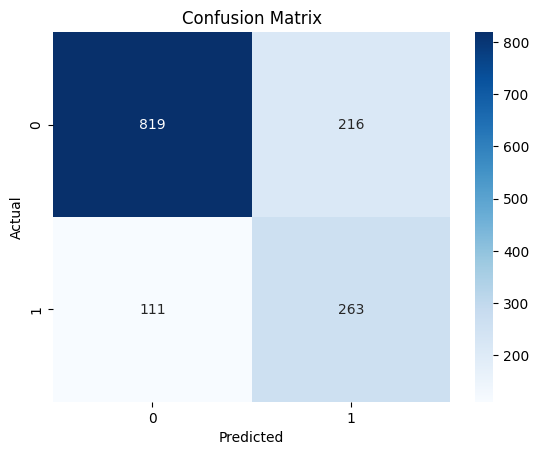

In [ ]:
cm = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

MODEL COMPARISON SUMMARY

In [ ]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "ROC-AUC": [
        roc_auc_score(y_test, pipe_log.predict_proba(X_test)[:,1]),
        roc_auc_score(y_test, pipe_rf.predict_proba(X_test)[:,1])
    ]
})

results

,Model,ROC-AUC
0,Logistic Regression,0.841298
1,Random Forest,0.838571


FEATURE IMPORTANCE

In [ ]:
#extract feature names
ohe = pipe_rf.named_steps['pre'].named_transformers_['cat'].named_steps['onehot']
feature_names = (
    list(num_cols) +
    list(ohe.get_feature_names_out(cat_cols))
)

In [ ]:
importances = pipe_rf.named_steps['clf'].feature_importances_


fi = pd.DataFrame({
    "Feature": feature_names,
    "Importance" : importances
}).sort_values(by="Importance" , ascending= False).head(15)

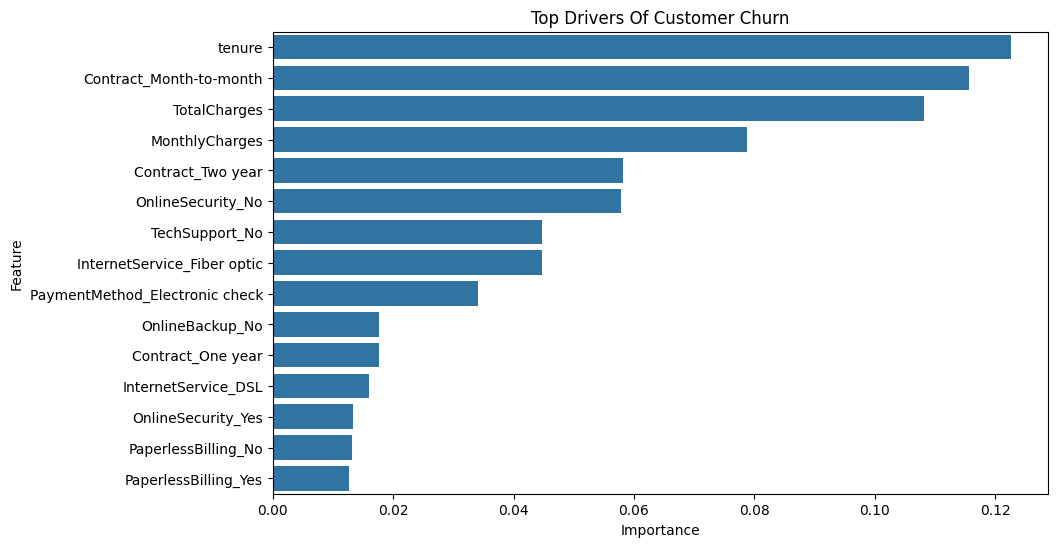

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=fi)
plt.title("Top Drivers Of Customer Churn")
plt.show()

In [ ]:
import joblib

joblib.dump(pipe_rf, "churn_prediction_model.pkl")

['churn_prediction_model.pkl']

## Key Insights

1. Customers with month-to-month contracts have significantly higher churn.
2. Customers with higher monthly charges are more likely to churn.
3. Long-tenure customers show strong retention behavior.

## Business Recommendations

- Introduce loyalty offers for customers after 6 months of tenure.
- Provide targeted discounts to high monthly charge customers.
- Encourage long-term contracts to reduce churn risk.

## Conclusion

This project demonstrates an end-to-end churn prediction pipeline,
combining data analysis, machine learning, and business interpretation
to support data-driven retention strategies.
